In [19]:
from reconstruction import reconstruct_vol_from_img
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import os
import glob
import h5py
from tqdm.auto import tqdm
from lfm.util import create_projection_image, volume_to_gif

In [20]:
pn_rec = r"Y:/hpc/r/lfm2025/recordings"
includes = ['']
excludes = []

recs = [os.path.basename(rec) for rec in sorted(glob.glob(os.path.expanduser(os.path.join(pn_rec, '*'))), reverse=True) if os.path.exists(os.path.join(pn_rec, rec, 'data.h5'))]
recs = [rec for rec in recs if all([s in rec for s in includes]) and not any([s in rec for s in excludes])]
print('\n'.join(recs))

20250513_1151_test
20250512_1954_LB_redFB_1-1k_3d_with movement_80fps
20250512_1951_LB_redFB_1-1k_3d_with movement
20250512_1949_LB_redFB_1-1k_3d_1
20250512_1946_LB_redFB_1-1k_3d


In [21]:
dataset_name = "20250513_1151_test"
fn = os.path.join(pn_rec, dataset_name, 'data.h5')
with h5py.File(fn, 'r') as f:
    print(f.keys())


<KeysViewHDF5 ['bg', 'data', 'n_frm', 'tstmp']>


OSError: Can't synchronously read data (can't find plugin. Check either HDF5_VOL_CONNECTOR, HDF5_PLUGIN_PATH, default location, or path set by H5PLxxx functions)

In [25]:
with h5py.File(fn, 'r') as f:
    bg = np.array(f['bg'])
    n_frm = np.array(f['n_frm'])
    tstmp = np.array(f['tstmp'])


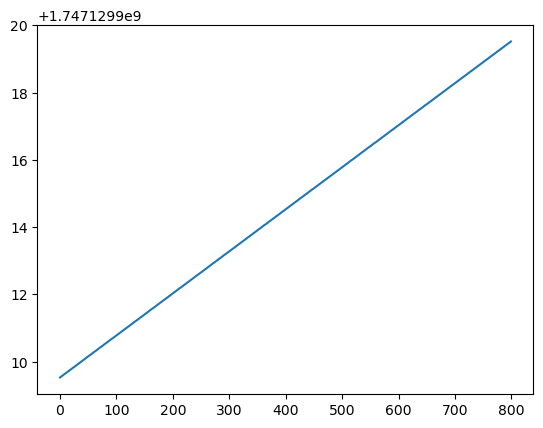